In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest, getCountDFbyPrefix

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [9]:
# Read in the count data by Kaz

datasetPrefix = '20220513-plateII-day0-E16'
datasetFolder = '../data/220509-30-for-bud-count-Kaz/count-all-planes/'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)

# - For Itgb1 KO
# - Plate C, mouse 1, by Shaohe
# - D2-D6, LV-188
# - D7-D11, LV-401
# - E2-E6, LV-402
# - E7-E11, LV-403

groups = ["sg-Control"]*5 + ["sg1-Itgb1"]*5 + ["sg2-Itgb1"]*5 + ["sg3-Itgb1"]*5
df["groups"] = groups

df["file_name_trimmed"] = [i[:-12] for i in df.file_name]

# This is day 0
df.rename(columns={'counts': 'counts_d0'}, inplace=True)

df0 = df

In [10]:
# Read in the count data by Kaz

datasetPrefix = '20220517-plateII-day4-endpoint'
datasetFolder = '../data/220509-30-for-bud-count-Kaz/count-single-plane/'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)

# - For Itgb1 KO
# - Plate C, mouse 1, by Shaohe
# - D2-D6, LV-188
# - D7-D11, LV-401
# - E2-E6, LV-402
# - E7-E11, LV-403 -- note that E05, E10 and E11 have no images (out of fields of view)

groups = ["sg-Control"]*5 + ["sg1-Itgb1"]*5 + ["sg2-Itgb1"]*4 + ["sg3-Itgb1"]*3
df["groups"] = groups

df["file_name_trimmed"] = [i[:-12] for i in df.file_name]

# This is day 4
df.rename(columns={'counts': 'counts_d4'}, inplace=True)

df4 = df

Summary of test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
sg-Control sg1-Itgb1   -0.631 0.5915 -2.0942  0.8321  False
sg-Control sg2-Itgb1  -0.6372  0.624 -2.1891  0.9147  False
sg-Control sg3-Itgb1    -1.84 0.0312 -3.5296 -0.1505   True
 sg1-Itgb1 sg2-Itgb1  -0.0062    0.9 -1.5581  1.5457  False
 sg1-Itgb1 sg3-Itgb1   -1.209 0.2039 -2.8985  0.4805  False
 sg2-Itgb1 sg3-Itgb1  -1.2028 0.2381 -2.9697  0.5641  False
-----------------------------------------------------------
p values of all pair-wise tests:
 [0.59151963 0.62403806 0.03123855 0.9        0.20391924 0.23810282]


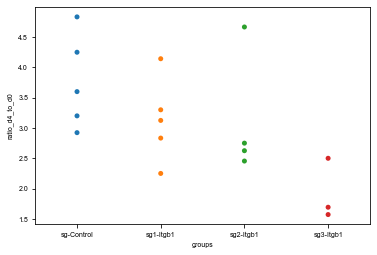

In [12]:
df = df0.merge(df4, on=['file_name_trimmed', 'groups'], how='inner')
df['ratio_d4_to_d0'] = df['counts_d4'] / df['counts_d0']

# Inspect raw data if curious about how they look
ax = sns.swarmplot(df.groups, df.ratio_d4_to_d0)

# Perform a Tukey test across groups
tukeyTest(df.ratio_d4_to_d0, df.groups)

# Use different variables to hold counting data by Kaz or Rei
df_Kaz = df

In [13]:
# Read in the count data by Rei

datasetPrefix = '20220513-plateII-day0-E16'
datasetFolder = '../data/220509-30-for-bud-count-Rei/count-all-planes/'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)

# - For Itgb1 KO
# - Plate C, mouse 1, by Shaohe
# - D2-D6, LV-188
# - D7-D11, LV-401
# - E2-E6, LV-402
# - E7-E11, LV-403

groups = ["sg-Control"]*5 + ["sg1-Itgb1"]*5 + ["sg2-Itgb1"]*5 + ["sg3-Itgb1"]*5
df["groups"] = groups

df["file_name_trimmed"] = [i[:-12] for i in df.file_name]

# This is day 0
df.rename(columns={'counts': 'counts_d0'}, inplace=True)

df0 = df

In [14]:
# Read in the count data by Rei

datasetPrefix = '20220517-plateII-day4-endpoint'
datasetFolder = '../data/220509-30-for-bud-count-Rei/count-single-plane/'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)

# - For Itgb1 KO
# - Plate C, mouse 1, by Shaohe
# - D2-D6, LV-188
# - D7-D11, LV-401
# - E2-E6, LV-402
# - E7-E11, LV-403 -- note that E05, E10 and E11 have no images (out of fields of view)

groups = ["sg-Control"]*5 + ["sg1-Itgb1"]*5 + ["sg2-Itgb1"]*4 + ["sg3-Itgb1"]*3
df["groups"] = groups

df["file_name_trimmed"] = [i[:-12] for i in df.file_name]

# This is day 4
df.rename(columns={'counts': 'counts_d4'}, inplace=True)

df4 = df

Summary of test:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower  upper  reject
----------------------------------------------------------
sg-Control sg1-Itgb1   0.2153    0.9 -1.5147 1.9452  False
sg-Control sg2-Itgb1    0.093    0.9 -1.7419 1.9279  False
sg-Control sg3-Itgb1  -0.6625 0.7482 -2.6601 1.3351  False
 sg1-Itgb1 sg2-Itgb1  -0.1223    0.9 -1.9572 1.7126  False
 sg1-Itgb1 sg3-Itgb1  -0.8778 0.5787 -2.8754 1.1198  False
 sg2-Itgb1 sg3-Itgb1  -0.7555  0.701 -2.8446 1.3336  False
----------------------------------------------------------
p values of all pair-wise tests:
 [0.9        0.9        0.74816209 0.9        0.57873111 0.70104521]


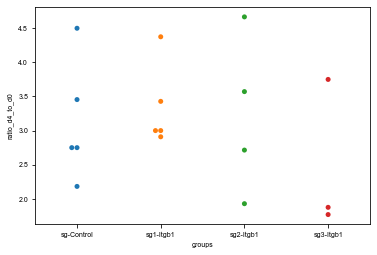

In [15]:
df = df0.merge(df4, on=['file_name_trimmed', 'groups'], how='inner')
df['ratio_d4_to_d0'] = df['counts_d4'] / df['counts_d0']

# Inspect raw data if curious about how they look
ax = sns.swarmplot(df.groups, df.ratio_d4_to_d0)

# Perform a Tukey test across groups
tukeyTest(df.ratio_d4_to_d0, df.groups)

# Use different variables to hold counting data by Kaz or Rei
df_Rei = df

In [17]:
# Merge the two data set and compare the countings of Rei and Kaz
df_Kaz.rename(columns={'counts_d0': 'counts_d0_Kaz'}, inplace=True)
df_Kaz.rename(columns={'counts_d4': 'counts_d4_Kaz'}, inplace=True)
df_Kaz.rename(columns={'ratio_d4_to_d0': 'ratio_d4_to_d0_Kaz'}, inplace=True)

df_Rei.rename(columns={'counts_d0': 'counts_d0_Rei'}, inplace=True)
df_Rei.rename(columns={'counts_d4': 'counts_d4_Rei'}, inplace=True)
df_Rei.rename(columns={'ratio_d4_to_d0': 'ratio_d4_to_d0_Rei'}, inplace=True)

df = df_Kaz.merge(df_Rei, on=['file_name_trimmed', 'groups'])
df.head()

,file_name_x_x,scrambled_file_name_x_x,counts_d0_Kaz,groups,file_name_trimmed,file_name_y_x,scrambled_file_name_y_x,counts_d4_Kaz,ratio_d4_to_d0_Kaz,file_name_x_y,scrambled_file_name_x_y,counts_d0_Rei,file_name_y_y,scrambled_file_name_y_y,counts_d4_Rei,ratio_d4_to_d0_Rei
0,Plate07152021_WellD02_ChannelMono_Seq0000.nd2,3836dff533d6ea602f0bd8db521dbaea.nd2,8,sg-Control,Plate07152021_WellD02_ChannelMono,Plate07152021_WellD02_ChannelMono_Seq0000.nd2,7e67ff81feefc59cf7bbf90152f416bb.nd2,34,4.250000,Plate07152021_WellD02_ChannelMono_Seq0000.nd2,3836dff533d6ea602f0bd8db521dbaea.nd2,8,Plate07152021_WellD02_ChannelMono_Seq0000.nd2,7e67ff81feefc59cf7bbf90152f416bb.nd2,36,4.500000
1,Plate07152021_WellD03_ChannelMono_Seq0001.nd2,6bbc522ff27e518d9aa86f2bd56333dc.nd2,6,sg-Control,Plate07152021_WellD03_ChannelMono,Plate07152021_WellD03_ChannelMono_Seq0001.nd2,c0d178a9f3c5ae9593de03380ce855b1.nd2,29,4.833333,Plate07152021_WellD03_ChannelMono_Seq0001.nd2,6bbc522ff27e518d9aa86f2bd56333dc.nd2,8,Plate07152021_WellD03_ChannelMono_Seq0001.nd2,c0d178a9f3c5ae9593de03380ce855b1.nd2,22,2.750000
2,Plate07152021_WellD04_ChannelMono_Seq0002.nd2,e2f18bb02c432d39358cd96a30974f59.nd2,10,sg-Control,Plate07152021_WellD04_ChannelMono,Plate07152021_WellD04_ChannelMono_Seq0003.nd2,3d7c7aca765240f0872d4690077d75c3.nd2,32,3.200000,Plate07152021_WellD04_ChannelMono_Seq0002.nd2,e2f18bb02c432d39358cd96a30974f59.nd2,12,Plate07152021_WellD04_ChannelMono_Seq0003.nd2,3d7c7aca765240f0872d4690077d75c3.nd2,33,2.750000
3,Plate07152021_WellD05_ChannelMono_Seq0003.nd2,9ae52b8c0b689672c30ce94c59fec432.nd2,13,sg-Control,Plate07152021_WellD05_ChannelMono,Plate07152021_WellD05_ChannelMono_Seq0000.nd2,c7cfd42c92b27ab38a15a55d8b3f1d97.nd2,38,2.923077,Plate07152021_WellD05_ChannelMono_Seq0003.nd2,9ae52b8c0b689672c30ce94c59fec432.nd2,11,Plate07152021_WellD05_ChannelMono_Seq0000.nd2,c7cfd42c92b27ab38a15a55d8b3f1d97.nd2,38,3.454545
4,Plate07152021_WellD06_ChannelMono_Seq0004.nd2,dfe92768263447130e6a36aeb744bdf0.nd2,10,sg-Control,Plate07152021_WellD06_ChannelMono,Plate07152021_WellD06_ChannelMono_Seq0001.nd2,1c0539bf960d35bdcda0bc39185dbde5.nd2,36,3.600000,Plate07152021_WellD06_ChannelMono_Seq0004.nd2,dfe92768263447130e6a36aeb744bdf0.nd2,11,Plate07152021_WellD06_ChannelMono_Seq0001.nd2,1c0539bf960d35bdcda0bc39185dbde5.nd2,24,2.181818


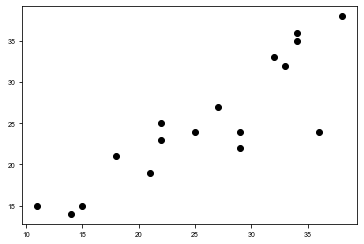

In [18]:
# plt.plot(df.ratio_d4_to_d0_Kaz, df.ratio_d4_to_d0_Rei, 'ok')
plt.plot(df.counts_d4_Kaz, df.counts_d4_Rei, 'ok')

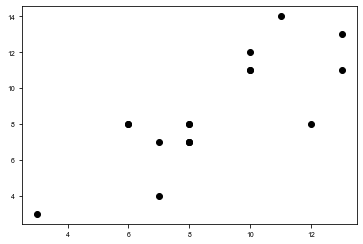

In [19]:
# plt.plot(df.ratio_d4_to_d0_Kaz, df.ratio_d4_to_d0_Rei, 'ok')
plt.plot(df.counts_d0_Kaz, df.counts_d0_Rei, 'ok')

In [20]:
df['counts_d0'] = (df['counts_d0_Rei'] + df['counts_d0_Kaz']) / 2
df['counts_d4'] = (df['counts_d4_Rei'] + df['counts_d4_Kaz']) / 2
df['ratio_d4_to_d0'] = df['counts_d4'] / df['counts_d0']

Summary of test:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower  upper  reject
----------------------------------------------------------
sg-Control sg1-Itgb1  -0.2006    0.9 -1.4694 1.0683  False
sg-Control sg2-Itgb1  -0.2426    0.9 -1.5884 1.1032  False
sg-Control sg3-Itgb1  -1.3202 0.0834 -2.7853  0.145  False
 sg1-Itgb1 sg2-Itgb1   -0.042    0.9 -1.3878 1.3038  False
 sg1-Itgb1 sg3-Itgb1  -1.1196  0.163 -2.5847 0.3455  False
 sg2-Itgb1 sg3-Itgb1  -1.0776 0.2156 -2.6099 0.4547  False
----------------------------------------------------------
p values of all pair-wise tests:
 [0.9        0.9        0.08335644 0.9        0.16301455 0.21558639]


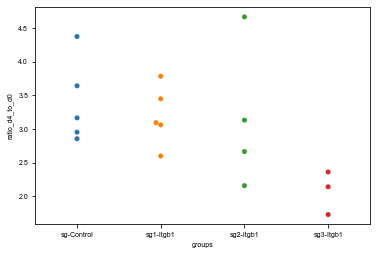

In [21]:
# Inspect raw data if curious about how they look
ax = sns.swarmplot(df.groups, df.ratio_d4_to_d0)

# Perform a Tukey test across groups
tukeyTest(df.ratio_d4_to_d0, df.groups)


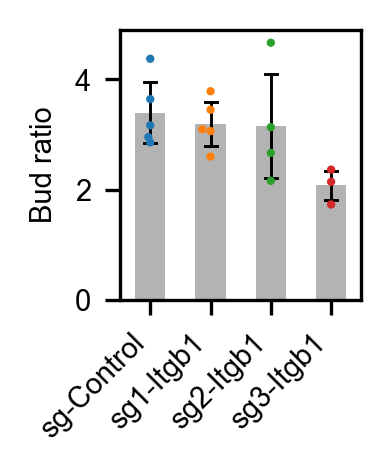

In [24]:
# Make plot for figure

fig_width, fig_height = 1.2, 1.5 # inches
line_width = .8
output_prefix = '220517-plateII-E16-d4-d0-Itgb1-no-blast'
outputFigPath = '../jupyter_figures/' + output_prefix + '.svg'
# outputFigPath = '../jupyter_figures/' + output_prefix + '.tif'

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.28, 0.35, 0.67, 0.6])

# palette_dict = {'sg-Control': 'black', 'sg1-Itgb1': 'blue', 'sg2-Itgb1': 'red'}

sns.swarmplot(data = df,
              x = 'groups', y = 'ratio_d4_to_d0',
              size = 2
             )
sns.barplot(data = df,
            x = 'groups', y = 'ratio_d4_to_d0',
            ci = 'sd',
            color=".7", # This a nicer looking lighter gray to my own taste
            errwidth=.7, errcolor="k", capsize=.2)

change_bar_width(ax, .5)

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

plt.xlabel("")
plt.ylabel("Bud ratio")

# ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)